In [1]:
include("ultrasoundgeneration.jl")

longcat (generic function with 1 method)

In [2]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.train_volumes_path)[1:30]

30-element Array{String,1}:
 "Pancreas_14.nrrd"
 "Pancreas_15.nrrd"
 "Pancreas_16.nrrd"
 "Pancreas_17.nrrd"
 "Pancreas_18.nrrd"
 "Pancreas_19.nrrd"
 "Pancreas_20.nrrd"
 "Pancreas_21.nrrd"
 "Pancreas_22.nrrd"
 "Pancreas_23.nrrd"
 "Pancreas_24.nrrd"
 "Pancreas_25.nrrd"
 "Pancreas_26.nrrd"
 ⋮                 
 "Pancreas_32.nrrd"
 "Pancreas_33.nrrd"
 "Pancreas_34.nrrd"
 "Pancreas_35.nrrd"
 "Pancreas_36.nrrd"
 "Pancreas_37.nrrd"
 "Pancreas_38.nrrd"
 "Pancreas_39.nrrd"
 "Pancreas_40.nrrd"
 "Pancreas_41.nrrd"
 "Pancreas_42.nrrd"
 "Pancreas_43.nrrd"

In [3]:
struct AnnotatedImage
    image::ItkImage
    annotation::Array{Array{Float64,1},1}
end


annotated_images = Array{AnnotatedImage, 1}()
for name = names
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.train_volumes_path)
    jimage = ItkImage(image)
    push!(annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_14.nrrdPancreas_15.nrrdPancreas_16.nrrdPancreas_17.nrrdPancreas_18.nrrdPancreas_19.nrrdPancreas_20.nrrdPancreas_21.nrrdPancreas_22.nrrdPancreas_23.nrrdPancreas_24.nrrdPancreas_25.nrrdPancreas_26.nrrdPancreas_27.nrrdPancreas_28.nrrdPancreas_29.nrrdPancreas_30.nrrdPancreas_31.nrrdPancreas_32.nrrdPancreas_33.nrrdPancreas_34.nrrdPancreas_35.nrrdPancreas_36.nrrdPancreas_37.nrrdPancreas_38.nrrdPancreas_39.nrrdPancreas_40.nrrdPancreas_41.nrrdPancreas_42.nrrdPancreas_43.nrrd

In [4]:
t_annotated_images = Array{AnnotatedImage, 1}()
for name = readdir(ultrasoundgeneration.test_volumes_path)
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.test_volumes_path)
    jimage = ItkImage(image)
    push!(t_annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_10.nrrdPancreas_11.nrrdPancreas_12.nrrdPancreas_13.nrrdPancreas_6.nrrdPancreas_7.nrrdPancreas_8.nrrdPancreas_9.nrrd

In [5]:
i = 0

0

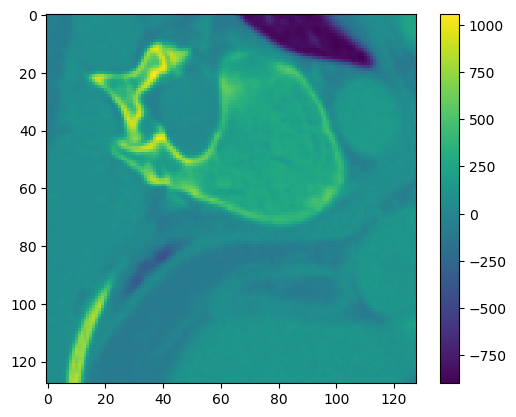

PyObject <matplotlib.colorbar.Colorbar object at 0x7f1e44408978>

In [9]:
using PyPlot
i += 1
t = generate_sample(annotated_images[i].image, annotated_images[i].annotation)
plt.imshow(t["data"][1])
colorbar()


In [7]:
network_parallel = pyimport("train_network_withangle")



2020-07-09 22:06:27.677307: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-07-09 22:06:27.682054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-09 22:06:27.682407: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.00GiB
2020-07-09 22:06:27.682417: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-07-09 22:06:27.899727: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-07-09 22:06:27.899749: I tensorflow/core/common_runtime/gpu/gpu_devi

PyObject <module 'train_network_withangle' from '/media/data/hastings/ct-angledslice-align/train_network_withangle.py'>

In [ ]:
net

In [8]:
network_parallel.model.load_weights("models/simulated_includeangle")

2020-07-09 22:06:28.610450: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open models/simulated_includeangle: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
2020-07-09 22:06:29.114437: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-07-09 22:06:29.114476: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-07-09 22:06:29.114480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2020-07-09 22:06:29.114483: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2020-07-09 22:06:29.114598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5683 MB memory) -> physical GPU (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)
202

In [10]:
function approx_ultrasound(y)
    y = copy(y)
    #y .+= 1000
    #y[:, :, 1:20,:].= .8
    y *= 2000
    y[y .== 0] .+= 0.001
    
    y[:, :, 1:end - 1, :] .= abs.(1 .- y[:, :, 2:end, :] ./ y[:, :, 1:end - 1, :])
    y[:, :, end, :] .= 0
    #return y
    denominator = cumsum(y, dims=3) .+ 0.01
    #return denominator
    return .5 .+ .1 .* max.(-10, log.(abs.( y ./ 4 .^ denominator .+ 0.0001 .* abs.(randn(size(y))))))
end

approx_ultrasound (generic function with 1 method)

In [28]:
tdata, tclasses = generate_data(
    [x.image for x in t_annotated_images],
    [x.annotation for x in t_annotated_images]
)
@time adata = approx_ultrasound(tdata)

#adata[:, :, :, [true, false, true, false]] .= 0

0

  2.990411 seconds (66 allocations: 1.442 GiB, 7.00% gc time)


0

In [11]:
alpha = 1

while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    
    
    
    data = data .* alpha .+ (1 - alpha) .* approx_ultrasound(data)
    
    
    network_parallel.model.fit(
        [data, classes[:, 4:end]], classes[:, 1:3], batch_size=90, 
        verbose=2, validation_data=((adata, tclasses[:, 4:end]), tclasses[:, 1:3])
    )
    if rand() < .1
        #network_parallel.model.save("models/includeangle3")
    end
    println(alpha)
    if alpha > 0
        alpha -= 0.01
    end
end

whoop
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lamb

2020-07-05 21:35:33.824506: W tensorflow/core/common_runtime/bfc_allocator.cc:211] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.94GiB. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2604 - val_loss: 9.5730
0.99
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2871 - val_loss: 10.6168
0.98
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 8s - loss: 0.2373 - val_loss: 11.5235
0.97
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2996 - val_loss: 11.4584
0.96
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3057 - val_loss: 12.3493
0.95
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3236 - val_loss: 12.8688
0.94
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3978 - val_loss: 9.1308
0.9299999999999999
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3399 - val_loss: 9.9680
0.9199999999999999
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3398 - val_loss: 9.0161
0.9099999999999999
Train on 2010 samples, validate on 

0.27999999999999936
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6041 - val_loss: 5.3191
0.26999999999999935
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5650 - val_loss: 5.4017
0.25999999999999934
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5920 - val_loss: 5.5752
0.24999999999999933
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5719 - val_loss: 6.9427
0.23999999999999932
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6871 - val_loss: 5.1466
0.22999999999999932
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.7981 - val_loss: 5.2776
0.2199999999999993
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6913 - val_loss: 5.2492
0.2099999999999993
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6685 - val_loss: 4.9825
0.1999999999999993
Train on 2010 samples, validate on 536 samples


InterruptException: InterruptException:

In [12]:


while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    
    
    
    data = approx_ultrasound(data)
    
    
    
    hist = network_parallel.model.fit(
        [data, classes[:, 4:end]], classes[:, 1:3], batch_size=90, 
        verbose=2, validation_data=((adata, tclasses[:, 4:end]), tclasses[:, 1:3])
    )
    if rand() < .1
        network_parallel.model.save("models/simulated_includeangle7")
    end
    println()
    if hist.history["val_loss"][1] < .55
        break
    end
    
end

whoop
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lamb

2020-07-09 09:43:23.139395: W tensorflow/core/framework/allocator.cc:122] Allocation of 209715200 exceeds 10% of system memory.
2020-07-09 09:43:23.191581: W tensorflow/core/framework/allocator.cc:122] Allocation of 209715200 exceeds 10% of system memory.
2020-07-09 09:43:23.243798: W tensorflow/core/framework/allocator.cc:122] Allocation of 209715200 exceeds 10% of system memory.
2020-07-09 09:43:23.308397: W tensorflow/core/framework/allocator.cc:122] Allocation of 209715200 exceeds 10% of system memory.
2020-07-09 09:43:26.852779: W tensorflow/core/common_runtime/bfc_allocator.cc:211] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.94GiB. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


In [10]:
using BenchmarkTools

In [10]:
network_parallel.model.compile(loss=network_parallel.keras.losses.mean_squared_error,
              optimizer=network_parallel.Adam(lr=0.00005))

In [8]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

  2.381736 seconds (5.91 M allocations: 2.022 GiB, 11.93% gc time)


0

In [333]:
@time data, classes = generate_data(
    [x.image for x in annotated_images], 
    [x.annotation for x in annotated_images]
)
0

  7.006066 seconds (1.91 M allocations: 9.626 GiB, 24.94% gc time)


0

In [334]:
data = approx_ultrasound(data)

2010×128×128×4 Array{Float64,4}:
[:, :, 1, 1] =
  0.0870934    0.0646413    0.0772049  …   0.228165     0.175166  
  0.255506    -0.107658     0.101954       0.319489     0.103692  
 -0.0243458    0.0678768   -0.0833622      0.289522     0.307487  
  0.140424     0.0717523   -0.0846146     -0.128622    -0.245119  
  0.221632     0.23497      0.250862       0.132898     0.163264  
  0.054999     0.360065     0.345332   …   0.197831     0.331299  
  0.0589776   -0.129202     0.0803824     -0.0993245    0.00338924
  0.183582     0.158069     0.162072       0.303664     0.142662  
  0.00133477  -0.0228275    0.0748467      0.0251537    0.0379356 
 -0.011031     0.00108428   0.0972727      0.360161     0.293912  
  0.129709     0.236279     0.126774   …   0.365787     0.357731  
  0.212115     0.155414     0.0426153      0.150394     0.215732  
  0.0894859    0.0516033    0.0535517      0.0933212    0.0869248 
  ⋮                                    ⋱                          
  0.197706    

In [335]:
data[:, :, :, [true, false, true, false]] .= 0

2010×128×128×2 view(::Array{Float64,4}, :, :, :, [1, 3]) with eltype Float64:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [33]:
predictions = network_parallel.model.predict((data, classes[:, 4:end]))
0

0

In [29]:
predictions = network_parallel.model.predict((adata, tclasses[:, 4:end]))
0

0

In [30]:
i = 0

0

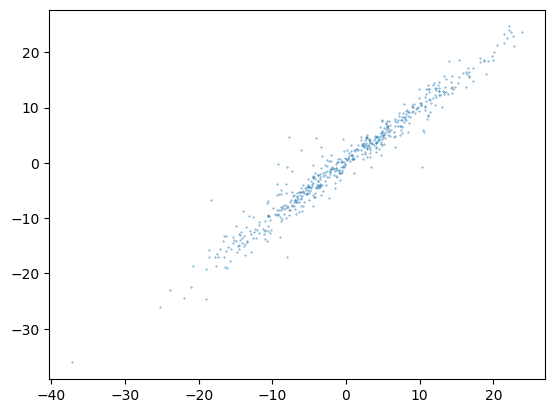

In [33]:
i += 1
scatter(4 .* tclasses[1:end, i], 4 .* predictions[1:end, i], s= 0.1)
show()
#println(4 * sum(abs.(tclasses[1:end, i] .+ predictions[1:end, i])))
#print(4 * sum(abs.(tclasses[1:end, i] .- predictions[1:end, i])))

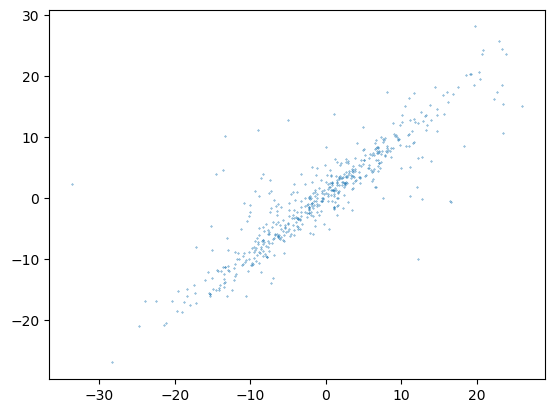

-476.13333

In [32]:
i += 1
scatter(4 .* tclasses[1:end, i], 4 .* predictions[1:end, i], s= 0.1)
show()

print(4 * sum(tclasses[1:end, i] .- predictions[1:end, i]))

In [54]:
sort(reshape(4 .* abs.(tclasses[1:end, 1:3] .- predictions[1:end, :]), (1608)))[Int(round(.5 * 1608))]

0.95579624f0

In [34]:
network_parallel.model.evaluate((adata, tclasses[:, 4:end]), tclasses[:, 1:3])

536/536 [==============================] - 1s 1ms/step


0.5380015348765388

In [336]:
network_parallel.model.evaluate((data, classes[:, 4:end]), classes[:, 1:3])

2010/2010 [==============================] - 3s 1ms/step


5.795411590082728

In [11]:
importlib = pyimport("importlib")

PyObject <module 'importlib' from '/home/hastings/anaconda3/envs/stylegan/lib/python3.6/importlib/__init__.py'>

35127296-element Array{Float64,1}:
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
  ⋮                  
  0.36602229172068157
  0.3660235070056443 
  0.36602389000737445
  0.3660242280328997 
  0.36602449106517804
  0.36602453163063087
  0.36602844827714276
  0.3660295943967151 
  0.36603019177683815
  0.36603563428147534
  0.36603920827165   
  0.3660474140444886 

In [20]:
image = t_annotated_images[3].image
an = t_annotated_images[3].annotation

2-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 94.3359375, 94.3359375, 95.01953125, 95.01953125, 95.703125, 95.703125, 96.38671875  …  148.33984375, 148.33984375, 149.0234375, 149.0234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                    
 [0.0, 0.0, 0.0, 0.0, 181.8359375, 181.8359375, 181.8359375, 181.8359375, 181.8359375, 181.8359375  …  179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 0.0, 0.0]

In [46]:
s = [
    generate_sample_deterministic(
        image, 
        origin_by_height(an, 50) .+ 35 .* upright[:, 1], 
        origin_by_height(an, 50 + t) .+ 35 .* upright[:, 1], 
        upright, 
        upright
    )
    for t = 0:1:70
]

71-element Array{Dict{String,Array{T,1} where T},1}:
 Dict("classes" => AbstractArray{Float64,N} where N[[0.0, 0.0, 0.0], [1.0 -0.0 0.0; 0.0 1.0 0.0; -0.0 0.0 1.0]],"data" => Array{Float32,2}[[524.8867 778.5078 … -18.449219 -27.382812; 595.65625 886.4922 … -47.234375 -56.691406; … ; 46.121094 39.753906 … 87.09375 87.53125; 54.210938 39.140625 … 88.765625 84.15625], [-865.5781 -902.0078 … -917.8203 -906.41797; -813.3281 -892.6836 … -900.0156 -864.8164; … ; 64.07422 82.17578 … 247.36719 172.14844; 83.625 87.59766 … 311.65234 236.41016], [524.8867 778.5078 … -18.449219 -27.382812; 595.65625 886.4922 … -47.234375 -56.691406; … ; 46.121094 39.753906 … 87.09375 87.53125; 54.210938 39.140625 … 88.765625 84.15625], [-865.5781 -902.0078 … -917.8203 -906.41797; -813.3281 -892.6836 … -900.0156 -864.8164; … ; 64.07422 82.17578 … 247.36719 172.14844; 83.625 87.59766 … 311.65234 236.41016]])                            
 Dict("classes" => AbstractArray{Float64,N} where N[[0.68359375, 1.0, 0.0], [1.0 

In [47]:
rdata, rclasses = samples_to_dataset(s)
adata = approx_ultrasound(rdata)
0


0

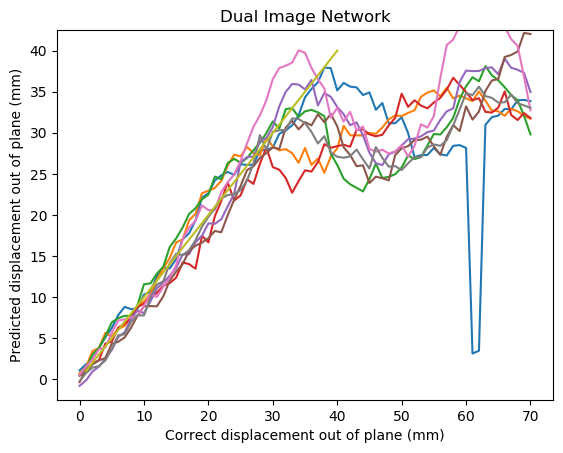

(-2.5, 42.5)

In [27]:
using PyPlot
function run_progressive_test(annotated_image)
    image = annotated_image.image
    an = annotated_image.annotation
    #image.array .= reverse(image.array, dims=1)
    

    s = [
        generate_sample_deterministic(
            image, 
            origin_by_height(an, 50) .+ 35 .* upright[:, 1], 
            origin_by_height(an, 50 + t) .+ 35 .* upright[:, 1], 
            upright, 
            upright
        )
        for t = 0:1:70
    ]

    rdata, rclasses = samples_to_dataset(s)
    rdata = approx_ultrasound(rdata)
    return rdata, rclasses
end
for an_im in t_annotated_images
    adata, rclasses = run_progressive_test(an_im)
    res = network_parallel.model.predict((adata, rclasses[:, 4:end]))
    plot(res[:, 2].* 4)
end
title("Dual Image Network")
xlabel("Correct displacement out of plane (mm)")
ylabel("Predicted displacement out of plane (mm)")
plot([1, 40], [1, 40])
axes = gca()
axes.set_ylim([-2.5, 42.5])

In [66]:
def approx_ultrasound(y):
    y = y + 1000
    y = abs(1 - y[:, 1:] / y[:, :-1])

    denominator = np.cumsum(y, axis=1) + 0.01
    return np.maximum(-10, np.log(np.abs(y / 4**denominator + 0.0001 * np.random.randn(128, 128)) ))

LoadError: syntax: extra token "approx_ultrasound" after end of expression

In [70]:
size(rdata)

(71, 128, 128, 4)

In [43]:
function approx_ultrasound(y)
    y = copy(y)
    #y .+= 1000
    #y[:, :, 1:20,:].= .8
    y *= 2000
    
    y[:, :, 1:end - 1, :] .= abs.(1 .- y[:, :, 2:end, :] ./ y[:, :, 1:end - 1, :])
    y[:, :, end, :] .= 0
    #return y
    denominator = cumsum(y, dims=3) .+ 0.01
    #return denominator
    return .5 .+ .1 .* max.(-10, log.(abs.( y ./ 4 .^ denominator .+ 0.0001 .* abs.(randn(size(y))))))
end

approx_ultrasound (generic function with 1 method)

In [44]:
@time a = approx_ultrasound(tdata)

  3.352569 seconds (1.85 M allocations: 1.516 GiB, 4.96% gc time)


536×128×128×4 Array{Float64,4}:
[:, :, 1, 1] =
  0.0776325   0.291851    0.311109    …   0.222936    0.282253    0.35006   
  0.123822    0.075359    0.050444        0.0543024   0.084198   -0.112493  
  0.304164    0.326532    0.0997144       0.0275027   0.098819    0.0361698 
 -0.131284   -0.111526    0.0186107      -0.110395   -0.0990993   0.00972159
  0.214418    0.330326    0.365934        0.365616    0.341175    0.232708  
  0.0883616   0.113179    0.118331    …   0.364515    0.34243     0.0922677 
  0.167069    0.123241    0.0927823      -0.0697642  -0.0713599   0.0115019 
  0.071363    0.15698     0.166852        0.358508    0.33316     0.162402  
  0.125796    0.119449    0.102276        0.0738281   0.0515281   0.11084   
  0.146492    0.118167    0.0499622       0.242845    0.252371    0.250066  
 -0.0233992   0.0996403   0.138658    …   0.277937    0.240831    0.107665  
 -0.186177   -0.0972108   0.00596493      0.160718    0.163981    0.16234   
 -0.02902     0.066002    0.0

In [18]:
i = 0

0

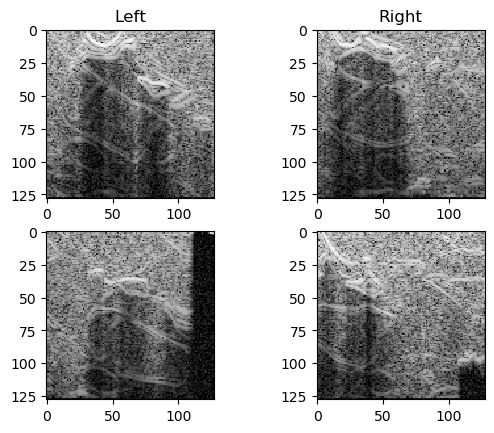

PyObject <matplotlib.image.AxesImage object at 0x7fe7cefccba8>

In [48]:
i += 1
i = 4
el = adata[i, :, :, :]


fig, axs = subplots(2, 2)
axs[1, 1].imshow(el[:, :, 1]', cmap="gray")
axs[1, 1].set_title("Left")
axs[1, 2].imshow(el[:, :, 2]', cmap="gray")
axs[1, 2].set_title("Right")
axs[2, 1].imshow(el[:, :, 3]', cmap="gray")

axs[2, 2].imshow(el[:, :, 4]', cmap="gray")



In [20]:
fig.savefig("figures/sample_ultrasound.png", dpi=300)

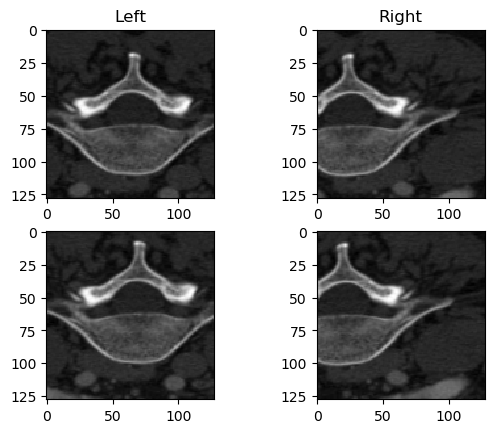

PyObject <matplotlib.image.AxesImage object at 0x7fe6d07d55f8>

In [395]:
i -= 1
el = tdata[i, :, :, :]


fig, axs = subplots(2, 2)
axs[1, 1].imshow(el[:, :, 1]', cmap="gray")
axs[1, 1].set_title("Left")
axs[1, 2].imshow(el[:, :, 2]', cmap="gray")
axs[1, 2].set_title("Right")
axs[2, 1].imshow(el[:, :, 3]', cmap="gray")

axs[2, 2].imshow(el[:, :, 4]', cmap="gray")



In [348]:
i = 350

350

In [50]:
tclasses[4, :] .* 4

6-element Array{Float32,1}:
  2.7884605
 22.675648 
  7.209023 
  0.3886934
  2.313119 
 -2.990928 

In [51]:
predictions[4, :] .* 4

3-element Array{Float32,1}:
 -0.012083508
 17.389456   
  8.966128   

In [221]:
function filter_allblack(el)
    return sum(el .< -.4) / size(el[:])[1] > .5
end

function filter_none_allblack(dual_image_pair)
    return !any(filter_allblack(dual_image_pair[:, :, i]) for i = 1:4)
end

filter_none_allblack (generic function with 1 method)

In [216]:

distances = map(argmax(tdata .> .2; dims=3)) do elem
    return elem[3]
end

536×128×1×4 Array{Int64,4}:
[:, :, 1, 1] =
  1   1   1   1   1   1   1   1   1  …   1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1  …   1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
 21  21  21  20  20  20  20  20  20  …   5   5   5   4   4   4   4   4   4
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   

In [231]:
clean = [filter_none_allblack(adata[i, :, :, :]) for i = 1:size(adata)[1]]

536-element Array{Bool,1}:
 1
 1
 1
 1
 0
 0
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [233]:
adata_clean = adata[clean, :, :, :]
tclasses_clean = tclasses[clean, :, :, :]

485×6×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 -0.553958   1.39239   -2.58908    -0.828111    0.10961     0.170376 
 -1.43131   -4.83754    1.63705    -0.27903    -0.208545   -0.336352 
  2.93187   -0.429268   1.64668     0.0730382   0.48604    -0.145914 
  2.85056   -5.65551   -2.56389    -0.508136    0.155324    0.81298  
  2.02694   -0.351128   2.63371     1.01423     0.0811279  -0.509122 
 -2.14362    5.91146    0.143091    0.40322     0.462974   -0.168148 
 -0.557981   1.59173   -1.10235    -0.0481101  -0.704785   -0.350157 
  0.549338   4.06923   -0.755754   -0.178624    1.35149     0.129572 
 -1.88502    2.25519    2.93977     0.514967   -0.379973   -0.732509 
  3.89095    1.5796    -0.241029   -0.640625    0.184237    0.157512 
 -2.34784   -1.59828    1.93138    -0.465996    0.43291    -0.396712 
 -1.92016   -2.39927   -3.86814    -0.552139    0.299184    1.12669  
  2.34002    2.5854     1.0237      0.383355    0.138835   -0.954231 
  ⋮                                            

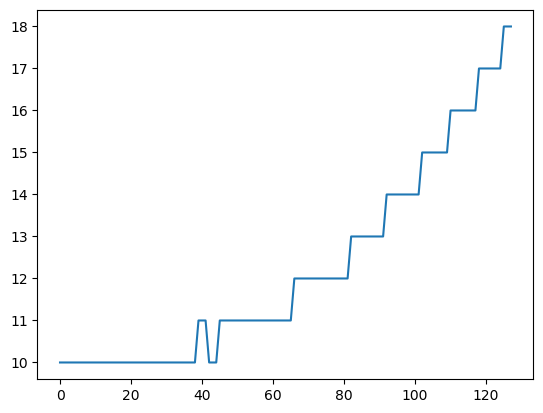

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e1b9395c0>

In [210]:
plot(distances[39, :, 1, 3])

In [218]:
distances2 = sort(distances[:])

274432-element Array{Int64,1}:
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   ⋮
 122
 123
 123
 124
 124
 125
 125
 126
 126
 127
 128
 128

In [219]:
distances2[Int64(round(.9 * length(distances2)))]

1

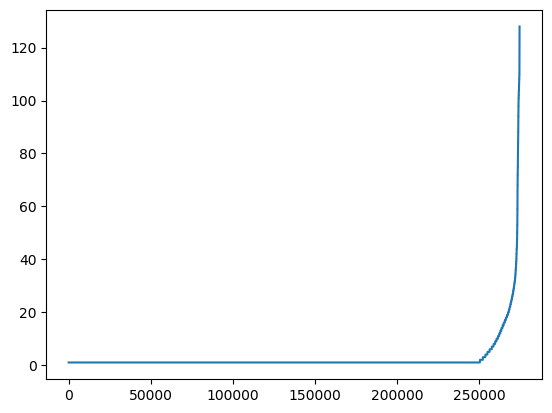

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e0d51d6a0>

In [220]:
plt.plot(distances2)

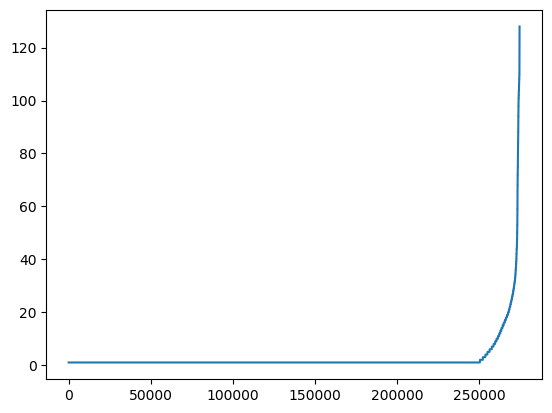

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e0d478dd8>

In [221]:
plt.plot(distances2)

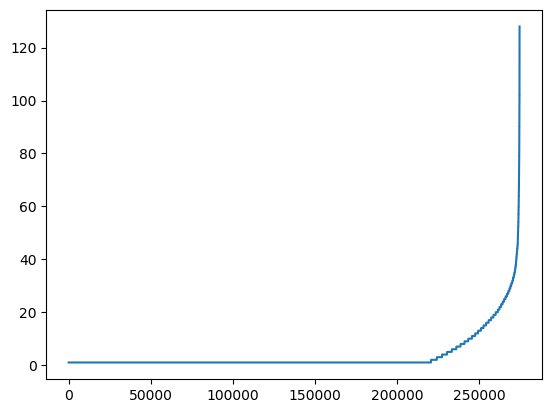

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e220c6748>

In [197]:
plt.plot(distances2)

In [11]:
loadChildrensTransfoms = pyimport("loadChildrensTransforms")
constants = pyimport("constants")

PyObject <module 'constants' from '/media/data/hastings/ct-angledslice-align/constants.py'>

In [12]:
transforms1 = loadChildrensTransfoms.transforms
0

0

In [13]:
transforms2 = loadChildrensTransfoms.getTransforms(constants.volumes_path * "HultrasoundI2R/h-20180315_120336_ImageToReference.mha")
0

0

In [14]:
scale = 1 / norm(transforms1[1, 1, 1:3])
ts1 = transforms1 .* scale
basic_b = RotXYZ(sum(hcat(map([RotXYZ(ts1[i, 1:3, 1:3]) for i in 1:size(ts1)[1]]) do r
    [r.theta1, r.theta2, r.theta3]
                end ...), dims=2) ./ size(ts1)[1] ...)
goodcoords1 = cat([reshape(upright * inv(basic_b) * ts1[i, 1:3, 1:4], (1, 3, 4)) 
        for i in 1:size(ts1)[1]]..., dims = 1)
0

0

In [15]:
scale = 1 / norm(transforms2[1, 1, 1:3])
ts2 = transforms2 .* scale
basic_b = RotXYZ(sum(hcat(map([RotXYZ(ts2[i, 1:3, 1:3]) for i in 1:size(ts2)[1]]) do r
    [r.theta1, r.theta2, r.theta3]
                end ...), dims=2) ./ size(ts2)[1] ...)
goodcoords2 = cat([reshape(upright * inv(basic_b) * ts2[i, 1:3, 1:4], (1, 3, 4)) 
        for i in 1:size(ts2)[1]]..., dims = 1)
0
0

0

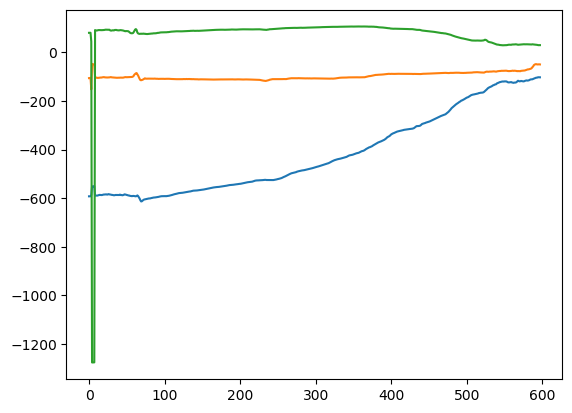

3-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1e4439c9e8>
 PyObject <matplotlib.lines.Line2D object at 0x7f1e4439cb38>
 PyObject <matplotlib.lines.Line2D object at 0x7f1e4439cc88>

In [16]:
plot(goodcoords1[:, :, 4] ./ scale)

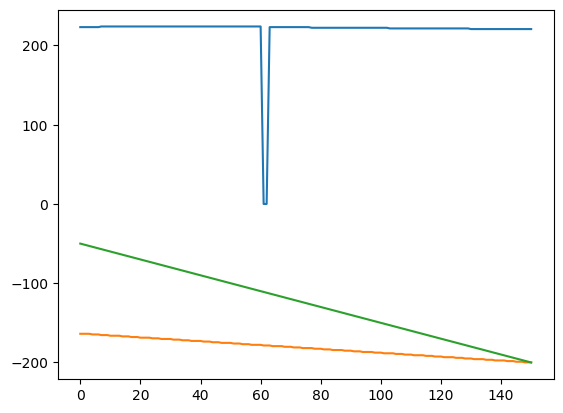

3-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1d70216c50>
 PyObject <matplotlib.lines.Line2D object at 0x7f1d70216dd8>
 PyObject <matplotlib.lines.Line2D object at 0x7f1d70216f28>

In [17]:
image, an = t_annotated_images[1].image, t_annotated_images[1].annotation
s = [ 
        origin_by_height(an, 50 + t) .+ 35 .* upright[:, 1]         
        for t = 0:1:150
    ]
plot(s)

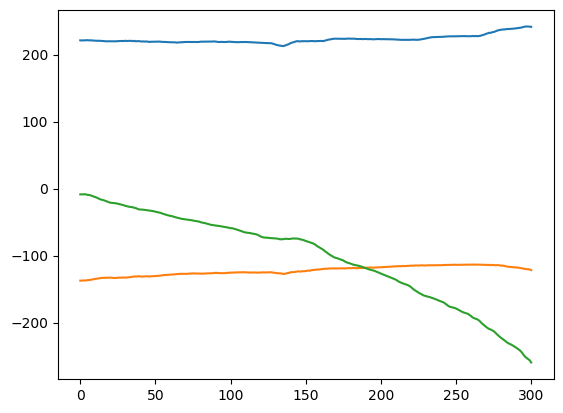

3-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1d7463dac8>
 PyObject <matplotlib.lines.Line2D object at 0x7f1d7463dc18>
 PyObject <matplotlib.lines.Line2D object at 0x7f1d7463dd68>

In [18]:
aligned = goodcoords1[:, :, 4]' ./ scale
aligned = [0 1 0 ; 0 0 1; -1 0 0] * aligned

aligned = RotXYZ(0, 0, 0) * aligned
aligned = aligned .+ [330; -220; -600]

aligned = aligned'
aligned = aligned[100:400, :]
plot(aligned)

In [19]:
gimage = GPUItkImage(image)

GPUItkImage(CuTexture{Float32,3,CuTextureArray{Float32,3}}(CuTextureArray{Float32,3}(Ptr{Nothing} @0x000000001ee0dd40, (223, 512, 512)), 0x0000000000000001), Float32[1.0 0.0 0.0; 0.0 -1.0 0.0; 0.0 0.0 -1.0], Float32[0.8203125, 0.8203125, 1.0], Float32[512.0, 512.0, 223.0])

In [32]:
qq = 220

s = [
    generate_sample_deterministic(
        gimage, 
        aligned[t, :] .+ 35 .* upright[:, 1], 
        aligned[t+10, :] .+ 35 .* upright[:, 1], 
        goodcoords1[t, :, 1:3], 
        goodcoords1[t + 10, :, 1:3]
    )
    for t = 1:10:290
]
tdata, tclasses = samples_to_dataset(s)
adata = approx_ultrasound(tdata)
0

0

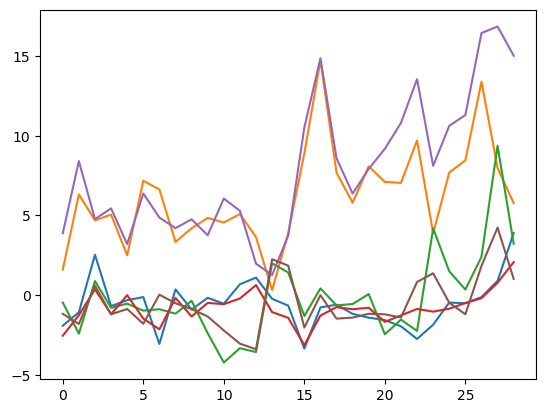

3-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1db01deac8>
 PyObject <matplotlib.lines.Line2D object at 0x7f1db00e8278>
 PyObject <matplotlib.lines.Line2D object at 0x7f1db00e83c8>

In [33]:
res = network_parallel.model.predict((adata, tclasses[:, 4:end]))
plot(res[:, 1:3].* 4)
plot(tclasses[:, 1:3] .* 4)

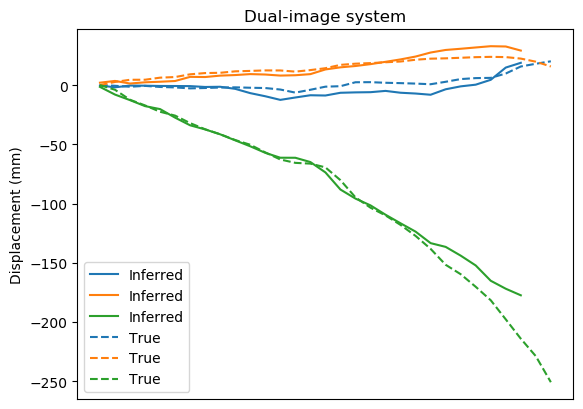

PyObject Text(24.0, 0.5, 'Displacement (mm)')

In [35]:
plot(cumsum(res[:, 1:3] * goodcoords1[10, 1:3, 1:3]', dims=1) .* 4, label="Inferred")
gca().set_prop_cycle(nothing)
plot(aligned[1:10:end, :] .- aligned[1:1, :], "--", label="True")
legend()
tick_params(
    axis="x",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom=false,      # ticks along the bottom edge are off
    top=false,         # ticks along the top edge are off
    labelbottom=false)
title("Dual-image system")
ylabel("Displacement (mm)")

In [181]:
adata

536×128×128×4 Array{Float64,4}:
[:, :, 1, 1] =
  0.361605    0.363939    0.35029     …   0.0444294  -0.150672    0.0813821 
 -0.0258716   0.117008    0.160802       -0.5         0.347817    0.356103  
 -0.0690279  -0.0792203   0.0667365       0.228846    0.221981   -0.153307  
  0.225843    0.0963584   0.169893        0.172715    0.177221    0.181824  
  0.137461   -0.0619019  -0.010342       -0.438363   -0.0676743   0.342874  
 -0.266052   -0.0510155   0.047858    …   0.365663    0.356319    0.357454  
  0.0661559  -0.114556    0.0872959       0.072197    0.0293787   0.0734042 
  0.0241757  -0.0833748  -0.00274132      0.106705    0.0572912  -0.00640407
  0.03522     0.052779    0.0463365       0.100903    0.1352     -0.101276  
  0.0204592   0.0647592   0.0659988       0.0200116   0.071418    0.0918181 
  0.0716074   0.0273506  -0.294416    …  -0.0293989   0.0663665   0.188345  
  0.0356425   0.091995   -0.180755        0.184055    0.184857    0.13854   
  0.160088    0.1612      0.1